<a href="https://colab.research.google.com/github/sabshock/Predictive-model/blob/main/Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Analysis and Prediction

### Problem Statment

#### Its important to identify high risk patients by the multiple risk factors such as diabetes, high blood pressure, high cholesterol, etc which is currently achieved by Medical Staffs, which may cause Human Errors while prediction.
#### Our goal is to predict patient with high risk of heart attack

In [44]:
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (10,5)
filterwarnings('ignore')
plt.rcParams['figure.facecolor'] = 'papayawhip'
import matplotlib.image as mpimg
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/heart_unclean.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trtbps - resting blood pressure (in mm Hg on admission to the hospital) systolic.

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = hypertrophy( Thicken of ventricule by cholestrol))

8. thalach - maximum heart rate achieved

9. exng - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest (mm)

11. slp - the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping) (Exercise tolerance testing)

12. caa - number of major vessels (0-3) colored by flourosopy

13. thal - 1 = normal; 2 = fixed defect; 3 = reversable defect (thallium stress test)


14. output - the predicted attribute - diagnosis of heart disease (angiographic disease status) 
(Value 0 , Value 1  )

In [45]:
heart = pd.read_csv(path)
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,asymptomatic,145,233,True,0,150,0,2.3,upsloping,0.0,1.0,1
1,37,1,non-anginal pain,130,250,False,1,187,0,3.5,upsloping,0.0,2.0,1
2,41,0,atypical angina,130,204,False,0,172,0,1.4,downsloping,0.0,2.0,1
3,56,1,atypical angina,120,236,False,1,178,0,0.8,downsloping,0.0,2.0,1
4,57,0,typical angina,120,354,False,1,163,1,0.6,downsloping,0.0,2.0,1


In [46]:
df = heart.copy()

# Understanding the data

In [47]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    object 
 11  caa       298 non-null    float64
 12  thall     301 non-null    float64
 13  output    303 non-null    int64  
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 31.2+ KB


In [48]:
heart.shape

(303, 14)

In [49]:
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           4
thall         3
output        2
dtype: int64

In [50]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         5
thall       2
output      0
dtype: int64

### Null value Treatment

In [51]:
heart[heart.caa.isnull()].output

92     1
158    1
163    1
164    1
251    0
Name: output, dtype: int64

Null value of categarical column is mostly of output = 1 so we imputted with the mode of the column

In [52]:
heart[heart.output == 1].caa.value_counts()

0.0    130
1.0     21
2.0      7
3.0      3
Name: caa, dtype: int64

In [53]:
df['caa'].fillna(0,inplace=True)

In [54]:
heart[heart.thall.isnull()].output

48     1
281    0
Name: output, dtype: int64

In [55]:
heart[heart.output == 1].thall.value_counts(),heart[heart.output == 0].thall.value_counts()

(2.0    130
 3.0     28
 1.0      6
 Name: thall, dtype: int64, 3.0    89
 2.0    36
 1.0    12
 Name: thall, dtype: int64)

In [56]:
df.iloc[48,-2] = 2
df.iloc[281,-2] = 3

In [57]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [58]:
h_cat = df[['sex','cp','fbs','restecg','exng','slp','caa','thall','output']]
h_num = df[['age','trtbps','chol','thalachh','oldpeak']]
target = df[['output']]

# Univarient Analysis

### Categorical Features Visualization

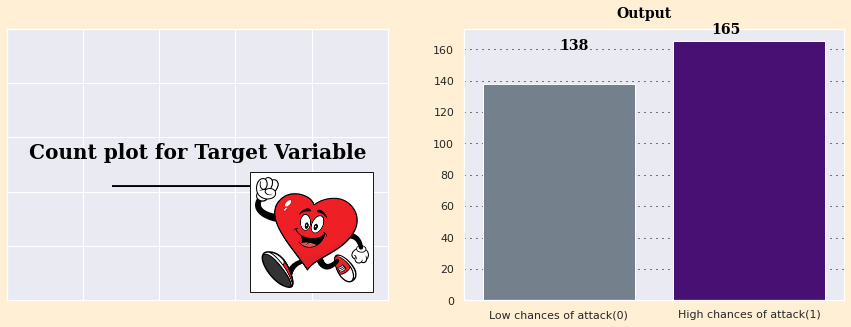

In [59]:
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(15,5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.5, hspace=0.5)
background_color = "lightcyan"
#fig.patch.set_facecolor(background_color)
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]


# Title
#ax0.patch.set_facecolor(background_color)
ax0.text(0.5,0.5,'Count plot for Target Variable\n_________________',
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 20,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

#ax0.spines[["bottom",'top','right','left']].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
path = "/content/drive/MyDrive/images.png"
character_img = mpimg.imread(path)
imagebox = OffsetImage(character_img, zoom=0.5)
xy = (.05, .1)
ab = AnnotationBbox(imagebox, xy,xybox=(.8,.25))
ax0.add_artist(ab)

# output count

ax1.text(0.3, 180, 'Output', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.text(0.0, 160, '138', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.text(0.8, 170, '165', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='output',palette=['slategray','indigo'])
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"]);

In [60]:
df.output.value_counts(normalize = True)*100

1    54.455446
0    45.544554
Name: output, dtype: float64

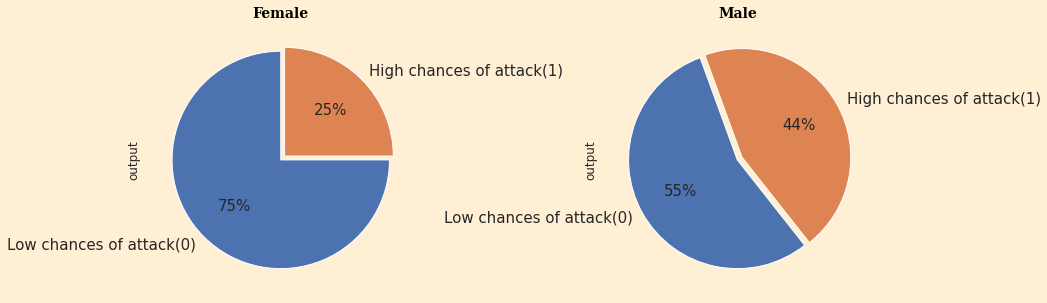

In [61]:
v = (df.groupby('sex').output.value_counts(normalize = True)*100)
plt.subplots(figsize=(15,5))
plt.subplot(121)
v[0].plot.pie(autopct = '%i%%',explode = [0.0,0.05],labels=["Low chances of attack(0)","High chances of attack(1)"],startangle=90,fontsize=15)
plt.xticks([])
plt.title('Female',fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
plt.subplot(122)
v[1].plot.pie(autopct = '%i%%',explode = [0.0,0.05],labels=["Low chances of attack(0)","High chances of attack(1)"],startangle=110,fontsize=15)
plt.title('Male',fontsize=14, fontweight='bold', fontfamily='serif', color="#000000");

Proportion of male getting heart attacks are High\
Male - 44%\
Female - 25%

## Count plot of Various categorical Features

In [62]:
['sex','cp','fbs','restecg','exng','slp','caa','thall','output']

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

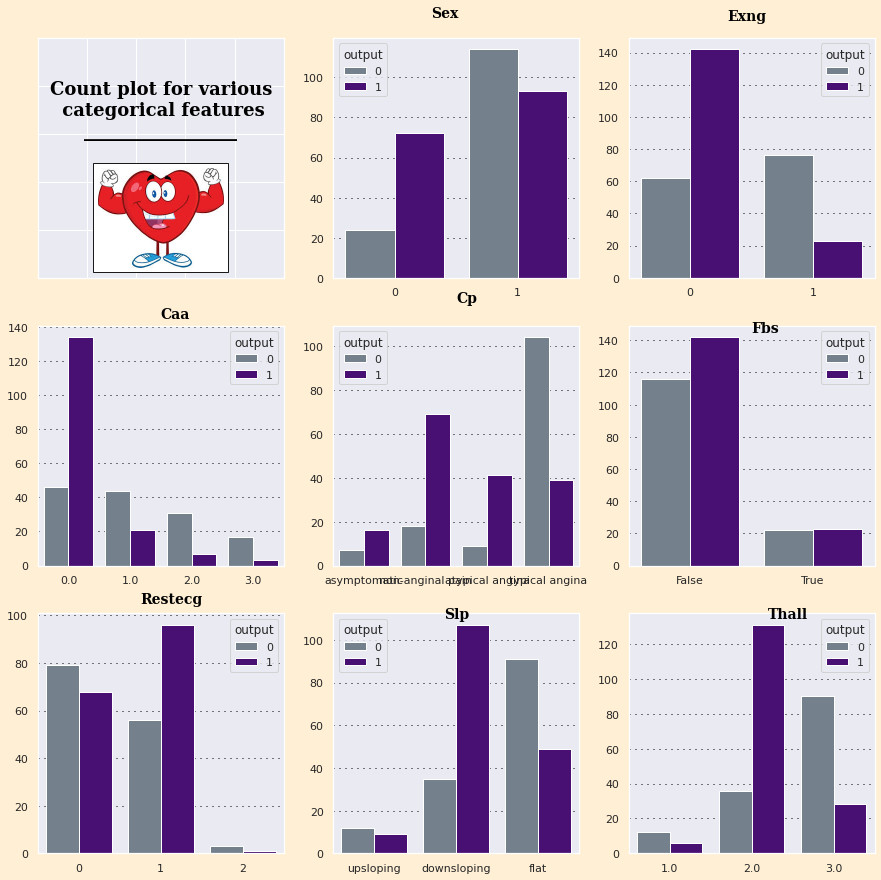

In [63]:
fig,((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8)) = plt.subplots(3,3,figsize=(15,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.5)
background_color = "lightcyan"
#fig.patch.set_facecolor(background_color)
color_palette = ['slategray','indigo']

# Title
path = "/content/drive/MyDrive/images (1).jfif"
character_img = mpimg.imread(path)
imagebox = OffsetImage(character_img, zoom=0.5)
xy = (.05, .1)
ab = AnnotationBbox(imagebox, xy,xybox=(.5,.25))
ax0.add_artist(ab)
#ax0.patch.set_facecolor(background_color)
ax0.text(0.5,0.7,'Count plot for various\n categorical features\n_________________',
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
#ax0.spines["bottom",'top','right','left'].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)




# Sex count
ax1.text(0.3, 130, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette,hue='output')
ax1.set_xlabel("")
ax1.set_ylabel("")
#plt.title('Sex',fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")


# Exng count
ax2.text(0.3, 160, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette,hue='output')
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 145, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette,hue='output')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 120, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette,hue='output')
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 145, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette,hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 105, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette,hue='output')
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 110, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette,hue='output')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 135, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette,hue='output')
ax8.set_xlabel("")
ax8.set_ylabel("");

#Caa 

number of major vessels (0-3) colored by flourosopy
person with issue in all major vessels has 74.5% probability of getting Heart attact

In [64]:
pd.crosstab(df.output,df.caa,normalize='columns')*100

caa,0.0,1.0,2.0,3.0
output,,,,
0,25.555556,67.692308,81.578947,85.0
1,74.444444,32.307692,18.421053,15.0


# Cp

chest pain

In [65]:
DF(df.groupby('cp').output.value_counts(normalize=True)*100).T

cp     asymptomatic            atypical angina       non-anginal pain  \
output            1          0               1     0                1   
output    69.565217  30.434783            82.0  18.0        79.310345   

cp                typical angina             
output          0              0          1  
output  20.689655      72.727273  27.272727

# Rest ECG

0 - Normal
1 - Having ST-T wave abnormality 
2 - Hypertrophy( blockage of ventricular )

Person having ST-T wave abnormality have high risk of heart attack

In [66]:
pd.crosstab(df.restecg,df.output,normalize='index')*100

output,0,1
restecg,,
0,53.741497,46.258503
1,36.842105,63.157895
2,75.000000,25.000000


# SLP - The slope of the peak exercise ST segment 

(0 = upsloping; 1 = flat; 2 = downsloping) (Exercise tolerance testing)

ST - down slop indicates high probability of having Heart attack 75.35%

In [67]:
pd.crosstab(df.slp,df.output,normalize='index')*100

output,0,1
slp,,
downsloping,24.647887,75.352113
flat,65.000000,35.000000
upsloping,57.142857,42.857143


# Thall - (thallium stress test)
1 = normal 
2 = fixed defect 
3 = reversable defect 

The person with Thalassemia disease ( Blood Disorder ) has 78.44 % chance of heart attack

In [68]:
pd.crosstab(df.thall,df.output,normalize='index')*100

output,0,1
thall,,
1.0,66.666667,33.333333
2.0,21.556886,78.443114
3.0,76.271186,23.728814


## Numerical Features Visualization

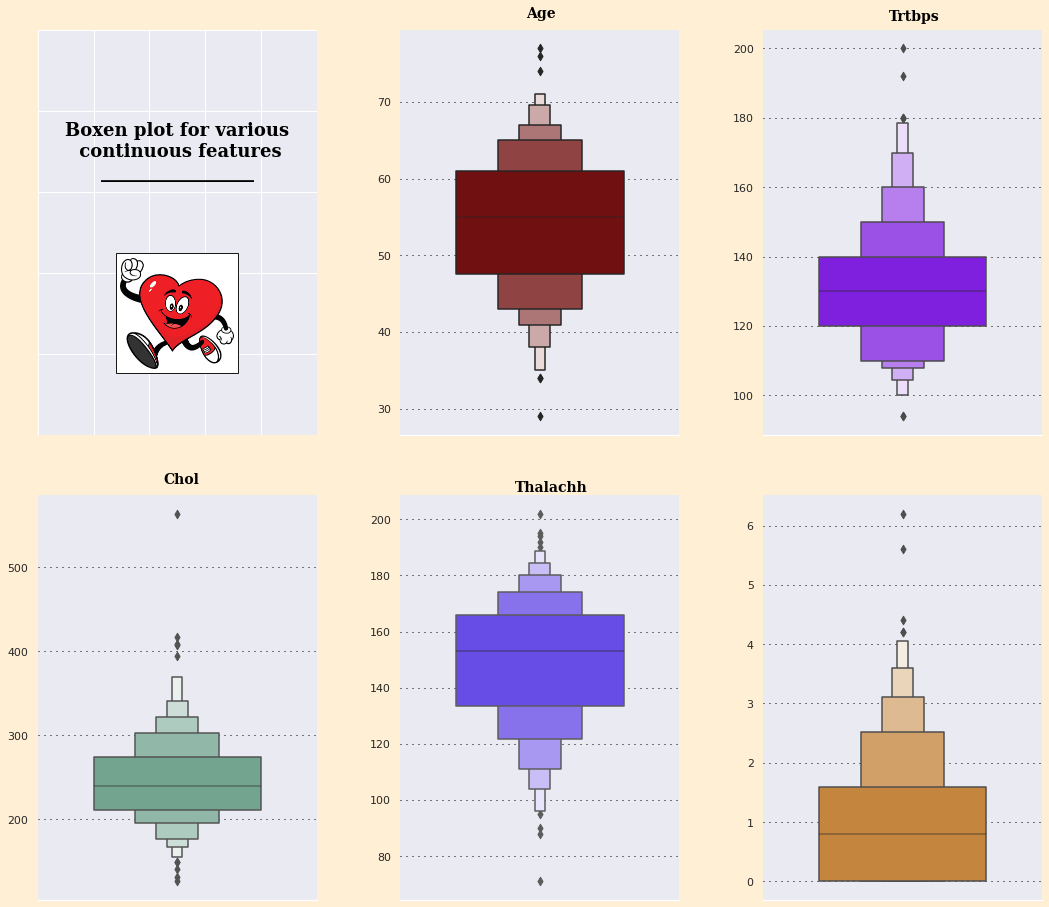

In [69]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

#background_color = "lightcyan"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
# Title of the plot
path = "/content/drive/MyDrive/images.png"
character_img = mpimg.imread(path)
imagebox = OffsetImage(character_img, zoom=0.5)
xy = (.05, .1)
ab = AnnotationBbox(imagebox, xy,xybox=(.5,.3))
ax0.add_artist(ab)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.7,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
#ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

In [70]:
h_num.describe().style.background_gradient('Greens')

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


75% of the sample Age is above 48


trtbps(Resting BP,systolic)
    90 to 120 mmHg normal
    130mmHg or high - high blood pressure
50% of the sample has high BP


chol -LDL - (Bad cholesterol)
    should less than 130 - mg/dl
    75% of the sample have high cholesterol


oldpeak - ST depression induced by exercise
   The standard criterion for an abnormal ST segment response is horizontal (planar) or downsloping depression of >1 mm
    less than 50% of sample have depression of >1 mm

# Bivariate Analysis

In [71]:
co = h_num.corr()
co.style.background_gradient('Greens')

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


# Assocition between categorical Variable using Cramers V

In [72]:
from scipy.stats import chi2_contingency,chisquare
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [73]:
c = df.drop(['age','oldpeak','trtbps','chol','thalachh'],axis=1).columns
co =  np.ones([9,9])
cv_mat = np.tril(np.ones_like(co))
x=0
for r in c:
    p=[]
    for i in c:
        if r != i:
            cv = cramers_v(df[r],df[i])
            p.append(cv)
        else:
            p_value = chisquare(df[i].value_counts().values,df[i].value_counts().values)
            p.append(p_value[1])
    cv_mat[x] = cv_mat[x] *p
    x+=1

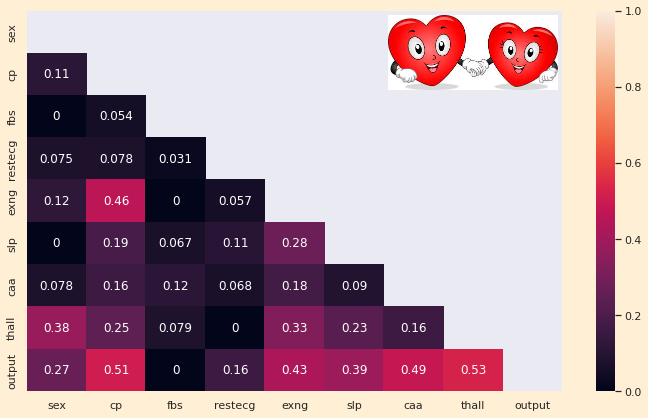

In [74]:
fig,ax = plt.subplots(figsize=(12,7))
sns.heatmap(DF(cv_mat,columns=c,index=c),mask=np.triu(np.ones([9,9])),annot=True,vmax=1,vmin=0)
path = "/content/drive/MyDrive/images.jfif"
character_img = mpimg.imread(path)
imagebox = OffsetImage(character_img, zoom=0.5)
xy = (.05, .1)
ab = AnnotationBbox(imagebox, xy,xybox=(7.5,1),frameon=False)
ax.add_artist(ab);

#### Independent variables ['cp','exxng','slp','caa','thall'] have stronge association with the target variable 'OUTPUT'
#### The independent variable cp and exng has stronge association with each other

# Correlation between numerical and categorical variable using Anova Test

In [32]:
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm
p=[]
for c in ['age','oldpeak','trtbps','chol','thalachh']:
    m = ols(f'{c} ~ sex + cp + fbs + restecg + exng + slp + caa  + thall + output',data=df).fit()
    aov_table = anova_lm(m, typ=2)
    p.append(list(aov_table['PR(>F)'].values[:-1]))

In [33]:
num = ['age','oldpeak','trtbps','chol','thalachh']
obj = df.drop(['age','oldpeak','trtbps','chol','thalachh'],axis=1).columns
DF(p,columns=obj,index=num).style.background_gradient('Blues')

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
age,0.454496,0.207980,0.247706,0.004848,0.304746,0.946775,0.000000,0.842068,0.416719
oldpeak,0.025390,0.112112,0.000000,0.873442,0.449520,0.198983,0.000385,0.184783,0.021855
trtbps,0.040685,0.009899,0.253576,0.016724,0.197193,0.724739,0.791332,0.600369,0.032137
chol,0.939881,0.968546,0.708543,0.000028,0.008522,0.461655,0.148202,0.102078,0.489025
thalachh,0.085605,0.869461,0.000000,0.641179,0.420230,0.003236,0.061587,0.224434,0.039892


In [34]:
df.groupby('sex').chol.mean()

sex
0    261.302083
1    239.289855
Name: chol, dtype: float64

#### Distribution of population Age of male and female are different
#### male has lower avg cholestrol level than female
#### People from all group has chance of getting Heart attack
#### Cholestrol levels are same for people who get heart attack and health

# Distribution of the numerical variable

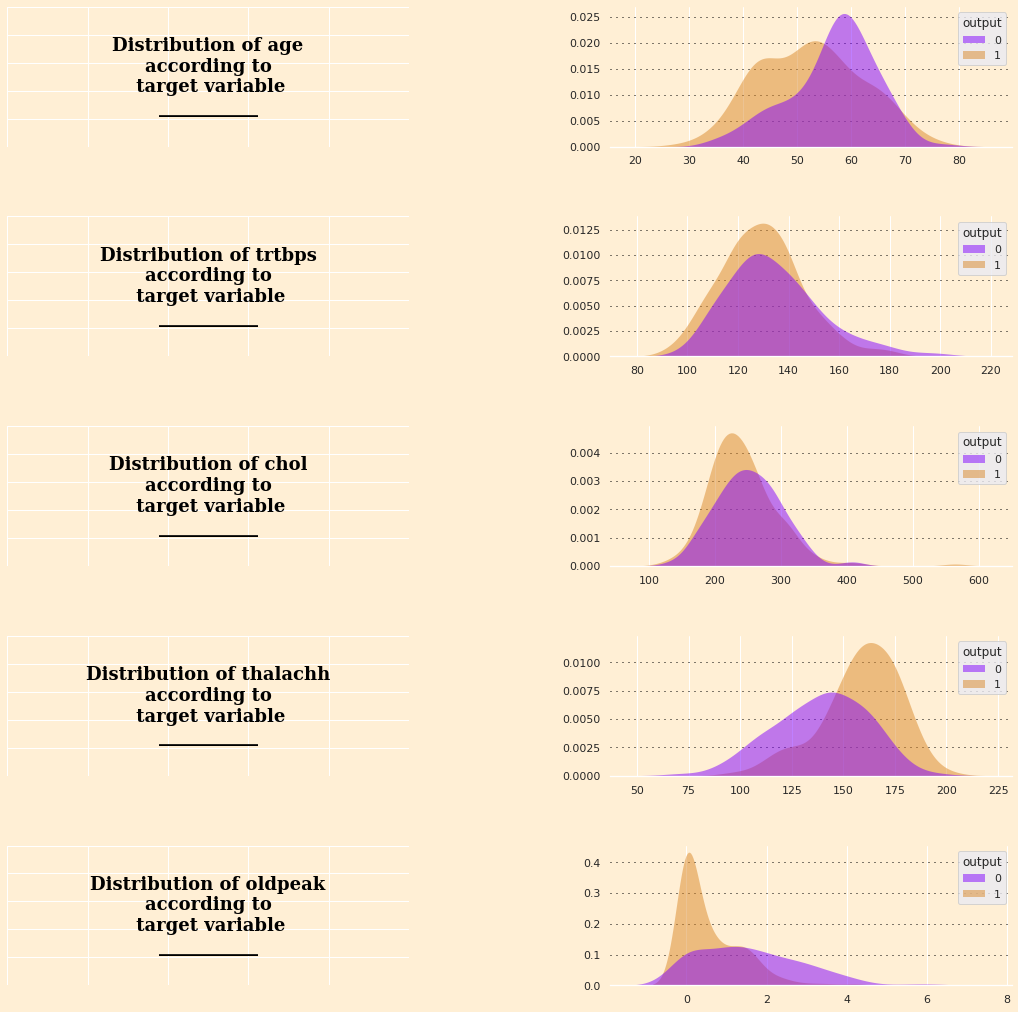

In [35]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "papayawhip"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 

for i in [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
    i.set_facecolor(background_color) 

d={}
c = ['age','trtbps','chol','thalachh','oldpeak']
a = [ax0,ax2,ax4,ax6,ax8]
for i,j in zip(c,a):
    d.update({i:j})
    
def Title(d):
    for i in d:
        d[i].text(0.5,0.5,f"Distribution of {i}\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
        d[i].spines["bottom"].set_visible(False)
        d[i].set_xticklabels([])
        d[i].set_yticklabels([])
        d[i].tick_params(left=False, bottom=False)
    return


# title
Title(d)


# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")


# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")


# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")


# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")


# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

# removing the spines
for i in ["top","left","right"]:
    for j in [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
        j.spines[i].set_visible(False)
    

#### 1.) It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
#### 2.) The distribution plot of chol wrt output tells us the cholestral levels are same for both
#### 3.) According to the distribution plot of thalachh wrt output, people with higher maximum heart rate( at rest ) have higher chances of heart attack.
#### 4.) The distribution plot of oldpeak wrt output, people with ST - Deppresion between (0 - 1 mm) have high risk of heart attack.

## Multivarient Analysis

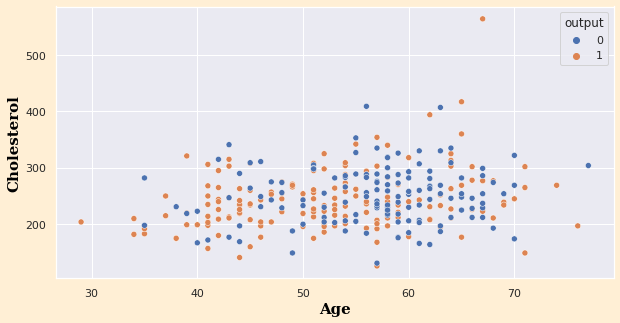

In [36]:
sns.scatterplot(x='age',y='chol',data = df,hue = 'output')
plt.xlabel('Age',fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
plt.ylabel('Cholesterol',fontsize=15, fontweight='bold', fontfamily='serif', color="#000000");

#### Age and Cholesterol have a Positive relation 
#### Person in Age range of (40 to 55) are more Prone to heart attack

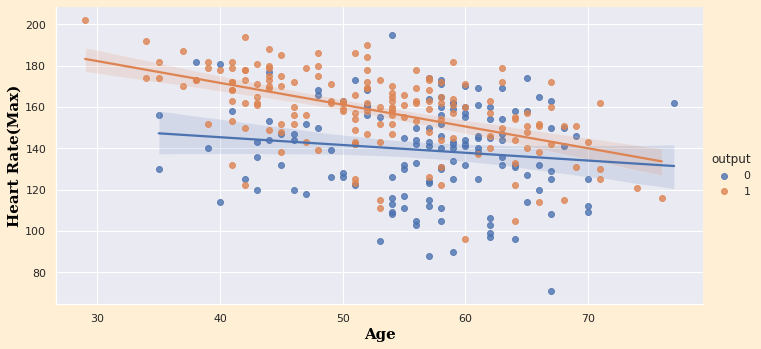

In [37]:
#fig,ax = plt.subplots(figsize=(15,5))
sns.lmplot(x='age',y='thalachh',data = df,hue = 'output',height=5,aspect=2)
plt.xlabel('Age',fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
plt.ylabel('Heart Rate(Max)',fontsize=15, fontweight='bold', fontfamily='serif', color="#000000");

#### We clear see a Negative correlation between Heart_Rate and Age
#### we can also say that person within the age of 40 to 50 with high heart rate has a high risk of getting Heart attack

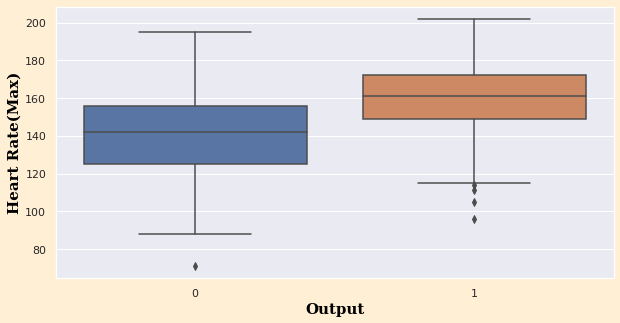

In [38]:
sns.boxplot(y='thalachh',data = df,x= 'output')
plt.xlabel('Output',fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
plt.ylabel('Heart Rate(Max)',fontsize=15, fontweight='bold', fontfamily='serif', color="#000000");

#### Patient with high Heart rate in rest state has high chance of Heart attack

# Encoding

Categorical columns to be encoded\
1.) cp - chest pain\
2.) fgs - Diabetic\
3.) slp - ST - T slope

In [39]:
from sklearn.preprocessing import OrdinalEncoder as oe

In [40]:
OE = oe(categories=[['typical angina','atypical angina','non-anginal pain','asymptomatic']])
df['cp'] = OE.fit_transform(df[['cp']])
df.fbs.replace({False:0,True:1},inplace=True)
df.slp.replace({'upsloping':0,'flat':1,'downsloping':2},inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    float64
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    float64
 12  thall     303 non-null    float64
 13  output    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


sex - sex (1 = male; 0 = female)
cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)
fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = hypertrophy( Thicken of ventricule by cholestrol))
exng - exercise induced angina (1 = yes; 0 = no)
slp - the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping) (Exercise tolerance testing)
caa - number of major vessels (0-3) colored by flourosopy
thal - 1 = normal; 2 = fixed defect; 3 = reversable defect (thallium stress test)


''

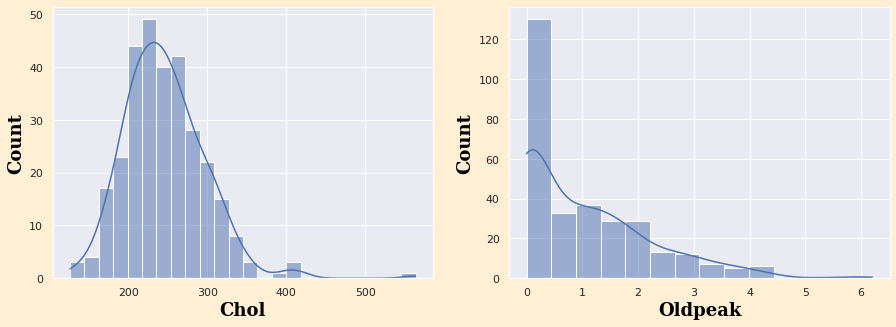

In [42]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.histplot(x='chol',data=heart,kde=True)
plt.ylabel('Count',fontsize = 18,fontweight='bold',fontfamily='serif',color='#000000')
plt.xlabel('Chol',fontsize = 18,fontweight='bold',fontfamily='serif',color='#000000')
plt.subplot(122)
sns.histplot(x='oldpeak',data=heart,kde=True)
plt.ylabel('Count',fontsize = 18,fontweight='bold',fontfamily='serif',color='#000000')
plt.xlabel('Oldpeak',fontsize = 18,fontweight='bold',fontfamily='serif',color='#000000')
;

In [43]:
df['oldpeak'] = pd.cut(heart.oldpeak,bins=[0,1,6.3],labels=['Normal','Downslope'],right=False)
df['oldpeak'] = pd.get_dummies(df.oldpeak,drop_first=True)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3.0,145,233,1,0,150,0,1,0,0.0,1.0,1
1,37,1,2.0,130,250,0,1,187,0,1,0,0.0,2.0,1
2,41,0,1.0,130,204,0,0,172,0,1,2,0.0,2.0,1
3,56,1,1.0,120,236,0,1,178,0,0,2,0.0,2.0,1
4,57,0,0.0,120,354,0,1,163,1,0,2,0.0,2.0,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,validation_curve
from sklearn.preprocessing import StandardScaler as ss
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
SS = ss()

In [ ]:
X = df.drop('output',axis = 1)
Y = df[['output']]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=5)
xtrain['chol'] = SS.fit_transform(xtrain[['chol']] )
xtest['chol'] = SS.transform(xtest[['chol']])
xctrain = sm.add_constant(xtrain)
lgm = sm.Logit(ytrain,xctrain).fit()
lgm.summary()

Optimization terminated successfully.
         Current function value: 0.357916
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  212
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           13
Date:                Wed, 21 Sep 2022   Pseudo R-squ.:                  0.4796
Time:                        04:35:07   Log-Likelihood:                -75.878
converged:                       True   LL-Null:                       -145.80
Covariance Type:            nonrobust   LLR p-value:                 2.255e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2568      3.149      0.399      0.690      -4.915       7.429
age            0.0170      0.028      0.600      0.549      -0.038       0.072
sex           -2.0135      0.571     -3.527      0.000      -3.132      -0.895
cp             0.6747      0.220      3.071      0.002       0.244       1.105
trtbps        -0.0249      0.012     -2.036      0.042      -0.049      -0.001
chol          -0.3268      0.231     -1.417      0.157      -0.779       0.125
fbs            0.4935      0.650      0.759      0.448      -0.781       1.768
restecg        0.5767      0.433      1.333      0.182      -0.271       1.424
thalachh       0.0282      0.013      2.158      0.031       0.003       0.054
exng          -1.1463      0.516     -2.219      0.026      -2.159      -0.134
oldpeak       -0.5347      0.500     -1.069      0.285      -1.515       0.446
slp            0.5990      0.397      1.510      0.131      -0.178       1.376
caa           -1.3050      0.315     -4.148      0.000      -1.922      -0.688
thall         -0.9298      0.342     -2.717      0.007      -1.600      -0.259
==============================================================================
"""

In [ ]:
LR = LogisticRegression()

In [ ]:
logm = LR.fit(xtrain,ytrain)
confusion_matrix(ytrain,logm.predict(xtrain))

array([[ 74,  21],
       [  9, 108]])

In [ ]:
confusion_matrix(ytest,logm.predict(xtest))

array([[39,  4],
       [ 5, 43]])

In [ ]:
print(classification_report(ytest,logm.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.91      0.90      0.91        48

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91



In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
rfe = RFECV(LR,min_features_to_select=4)
m = rfe.fit(X,Y)

In [ ]:
xtrain.columns[m.support_]

Index(['sex', 'cp', 'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype='object')

# DecisionTreeClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       117

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        43
           1       0.76      0.71      0.73        48

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.73        91



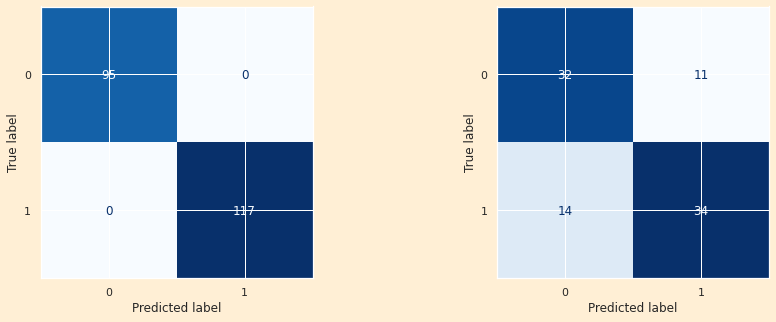

In [ ]:
dt = DecisionTreeClassifier(random_state=5,class_weight='balanced')
dtm = dt.fit(xtrain,ytrain)
dt_ytrain = dtm.predict(xtrain)
dt_ytest = dtm.predict(xtest)
print(classification_report(ytrain,dt_ytrain))
print(classification_report(ytest,dt_ytest))
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,dt_ytrain,ax=ax[0],cmap='Blues',values_format='d',colorbar=False)
ConfusionMatrixDisplay.from_predictions(ytest,dt_ytest,ax=ax[1],cmap='Blues',values_format='d',colorbar=False);

In [ ]:
param_range = np.arange(1,12)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1,cv=5,scoring='recall_weighted')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

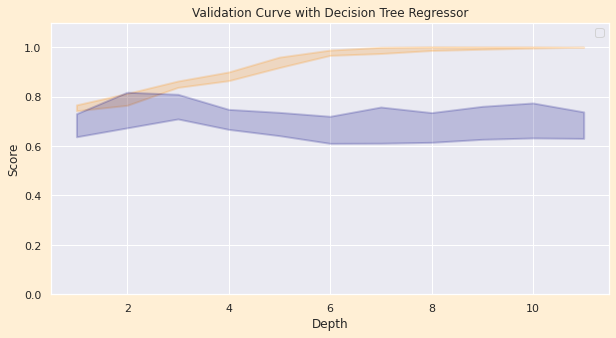

In [ ]:
plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
#plt.semilogx(param_range, train_scores_mean, label="Training score",color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        95
           1       0.84      0.79      0.81       117

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        43
           1       0.77      0.77      0.77        48

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



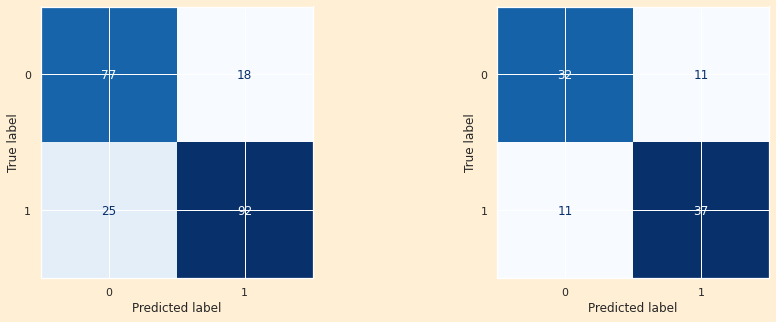

In [ ]:
dt = DecisionTreeClassifier(random_state=5,class_weight='balanced',max_depth=2)
dtm = dt.fit(xtrain,ytrain)
dt_ytrain = dtm.predict(xtrain)
dt_ytest = dtm.predict(xtest)
print(classification_report(ytrain,dt_ytrain))
print(classification_report(ytest,dt_ytest))
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,dt_ytrain,ax=ax[0],cmap='Blues',values_format='d',colorbar=False)
ConfusionMatrixDisplay.from_predictions(ytest,dt_ytest,ax=ax[1],cmap='Blues',values_format='d',colorbar=False);

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import cross_validate,StratifiedKFold,GridSearchCV
param = {'max_depth':np.arange(1,10),
'n_estimators':[50,100],
'min_samples_split':[2,4,6],
'min_samples_leaf':[2,4,6],
'max_leaf_nodes':[2,4,6]}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
grid = GridSearchCV(RandomForestClassifier(random_state=5),param_grid=param,scoring='recall_weighted')
rf_grid = grid.fit(xtrain,ytrain)

In [ ]:
rf_grid.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
print(classification_report(ytest,rf_grid.predict(xtest)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.90      0.94      0.92        48

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



In [ ]:
import pickle
file_handle = open('heart_rf_grid.pkl','wb')
pickle.dump(rf_grid,file_handle)
from google.colab import files
files.download('heart_rf_grid.pkl')

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        95
           1       0.83      0.91      0.87       117

    accuracy                           0.85       212
   macro avg       0.85      0.84      0.85       212
weighted avg       0.85      0.85      0.85       212

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.90      0.94      0.92        48

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



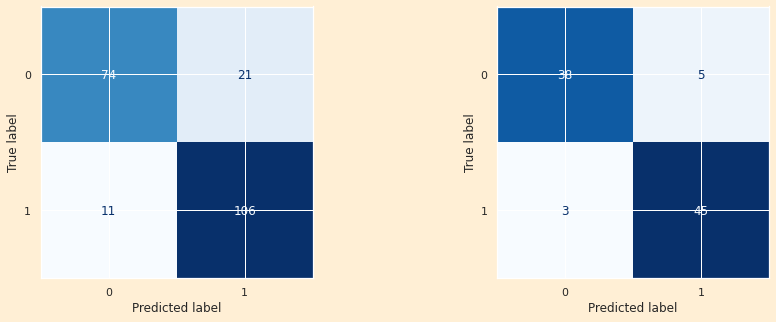

In [ ]:
rf_ytrain = ml.predict(xtrain)
rf_ytest = ml.predict(xtest)
print(classification_report(ytrain,rf_ytrain))
print(classification_report(ytest,rf_ytest))
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,rf_ytrain,ax=ax[0],cmap='Blues',values_format='d',colorbar=False)
ConfusionMatrixDisplay.from_predictions(ytest,rf_ytest,ax=ax[1],cmap='Blues',values_format='d',colorbar=False);

# XGBClassifier

In [ ]:
from sklearn.model_selection import cross_validate,StratifiedKFold,GridSearchCV
param = {'max_depth':np.arange(1,10),
'n_estimators':[50,100,150,200],
'min_samples_split':[2,4,6],
'min_samples_leaf':[2,4,6],
'max_leaf_nodes':[2,4,6]}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
xg_grid = GridSearchCV(XGBClassifier(random_state=5),param_grid=param,scoring='recall_weighted')
xg_grid = grid.fit(xtrain,ytrain)

In [ ]:
xg_grid.best_params_

{'max_depth': 2,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.93      0.94      0.94       117

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.93      0.93      0.93       212

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.89      0.88      0.88        48

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



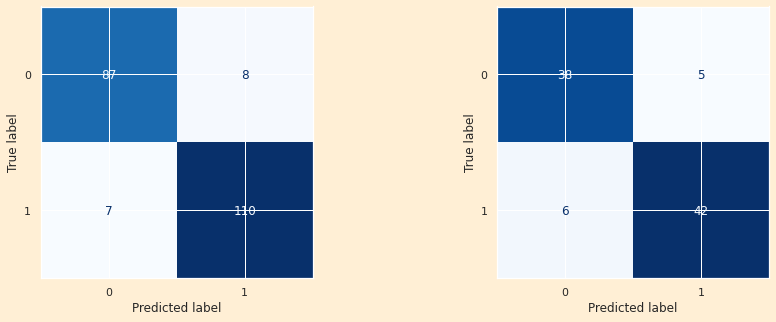

In [ ]:
xg_ytrain = xg_grid.predict(xtrain)
xg_ytest = xg_grid.predict(xtest)
print(classification_report(ytrain,xg_ytrain))
print(classification_report(ytest,xg_ytest))
fig,ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(ytrain,xg_ytrain,ax=ax[0],cmap='Blues',values_format='d',colorbar=False)
ConfusionMatrixDisplay.from_predictions(ytest,xg_ytest,ax=ax[1],cmap='Blues',values_format='d',colorbar=False);

In [ ]:
pickle.dump(xg_grid,open('heart_xg_grid.pkl','wb'))

In [ ]:
ml = pickle.load(open('heart_xg_grid.pkl','rb'))
ml

GridSearchCV(estimator=XGBClassifier(missing=nan, random_state=5),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': [2, 4, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100]},
             scoring='recall_weighted')

In [ ]:
from google.colab import files
files.download('heart_xg_grid.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### The tunned model of RandomForestClassifier has the highest accuracy(91%) and recall of 91%

In [ ]:
accuracy_score(ytest,rf_ytest)*100

91.20879120879121